## Information
This Is The Code For House Price Prediction Machine Learning Model.<br>
The Model Is Trained On Pune House Data.<br>
Link Of CSV File:- https://www.kaggle.com/datasets/saipavansaketh/pune-house-data?select=Pune+house+data.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Loadind And Visualing The Data

In [2]:
PuneDf = pd.read_csv("HouseData_Pune.csv")

In [3]:
PuneDf.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [4]:
PuneDf.shape

(13320, 9)

In [5]:
PuneDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
PuneDf.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
for column in PuneDf.columns:
    print(PuneDf[column].value_counts())
    print("*"*40)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
****************************************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
****************************************
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1

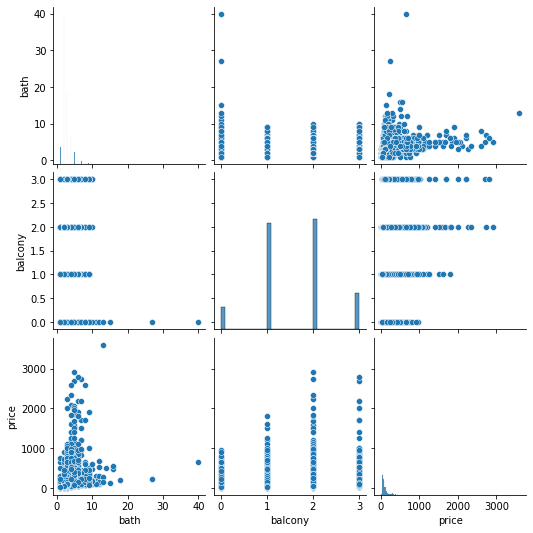

In [8]:
sns.pairplot(PuneDf)

<AxesSubplot:>

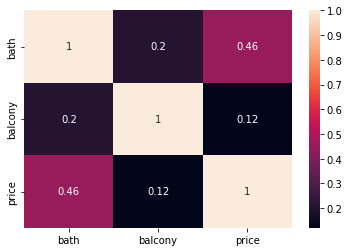

In [9]:
sns.heatmap(PuneDf.corr(), annot=True)

## Replacing Null Values

In [10]:
PuneDf.isna().sum()

area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

In [11]:
PuneDf["size"] = PuneDf['size'].fillna("2 BHK")

In [12]:
PuneDf["bath"] = PuneDf['bath'].fillna(PuneDf["size"].str.split().str.get(0).astype(float))

In [13]:
PuneDf["site_location"] = PuneDf['site_location'].fillna("Sadashiv Peth")

In [14]:
PuneDf.isna().sum()

area_type           0
availability        0
size                0
society          5502
total_sqft          0
bath                0
balcony           609
price               0
site_location       0
dtype: int64

## Dropping Unwanted Rows And Columns

In [15]:
PuneDf.drop(columns=["area_type", "availability", "society", "balcony"], inplace=True)

In [16]:
# Changing and Modifying "size" column to "bhk"
PuneDf["bhk"] = PuneDf["size"].str.split().str.get(0).astype(int)

In [17]:
PuneDf.drop(columns=["size"], inplace=True)

In [18]:
PuneDf.head()

,total_sqft,bath,price,site_location,bhk
0,1056,2.0,39.07,Alandi Road,2
1,2600,5.0,120.00,Ambegaon Budruk,4
2,1440,2.0,62.00,Anandnagar,3
3,1521,3.0,95.00,Aundh,3
4,1200,2.0,51.00,Aundh Road,2


## Cleaning The Data And Removing Outliers

In [19]:
PuneDf.describe()

,bath,price,bhk
count,13320.000000,13320.000000,13320.000000
mean,2.694069,112.565627,2.802778
std,1.340133,148.971674,1.294496
min,1.000000,8.000000,1.000000
25%,2.000000,50.000000,2.000000
50%,2.000000,72.000000,3.000000
75%,3.000000,120.000000,3.000000
max,40.000000,3600.000000,43.000000


In [20]:
PuneDf.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
# Some values in "total_sqft" are in range, so we need to convert them
def convertRangeValue(x):
    value = x.split("-")
    if len(value) == 2:
        return (float(value[0]) + float(value[1])) / 2
    try:
        return float(x)
    except:
        return None
    
PuneDf.total_sqft = PuneDf["total_sqft"].apply(convertRangeValue)

In [22]:
# Making a new column "price_per_sqft"
PuneDf["price_per_sqft"] = PuneDf.price * 100000 / PuneDf.total_sqft

In [23]:
# Some values in "total_sqft" are very small and some are very large which is an outlier, so we have to fix it.

# For Small values ---
PuneDf.total_sqft = PuneDf.total_sqft.apply(lambda x: 300. if x < 300. else x)

# For Large values ---
def removeOutlier_sqft(df):
    df_output = pd.DataFrame()
    for key, subdf in df.groupby("site_location"):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        new_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_output = pd.concat([df_output, new_df], ignore_index=True)
    return df_output
PuneDf = removeOutlier_sqft(PuneDf)

In [24]:
PuneDf.total_sqft 

0        1056.0
1        2894.0
2        1084.0
3        1230.0
4        4046.0
          ...  
11633    1050.0
11634     970.0
11635    1140.0
11636    1464.0
11637    1132.0
Name: total_sqft, Length: 11638, dtype: float64

In [25]:
PuneDf.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,11638.000000,11638.000000,11638.000000,11638.000000,11638.000000
mean,1492.959658,2.539096,88.134606,2.650026,5623.778914
std,865.101855,1.139030,77.199457,1.091876,2120.193850
min,300.000000,1.000000,8.000000,1.000000,1379.310345
25%,1100.000000,2.000000,48.450000,2.000000,4200.000000
50%,1270.000000,2.000000,67.000000,2.000000,5200.000000
75%,1635.000000,3.000000,100.000000,3.000000,6575.120252
max,30400.000000,40.000000,2100.000000,43.000000,31250.000000


In [26]:
PuneDf[PuneDf.bhk > 10]

,total_sqft,bath,price,site_location,bhk,price_per_sqft
1287,6000.0,12.0,150.0,Bibvewadi,11,2500.000000
2347,1250.0,15.0,125.0,Dhankawadi,14,10000.000000
5623,5425.0,13.0,275.0,Kondhwa Khurd,13,5069.124424
6800,10000.0,16.0,550.0,Model colony,16,5500.000000
9116,5000.0,9.0,360.0,Salunke Vihar,11,7200.000000
9160,2400.0,40.0,660.0,Salunke Vihar,43,27500.000000


In [27]:
PuneDf[PuneDf.bath > 10]

,total_sqft,bath,price,site_location,bhk,price_per_sqft
1287,6000.0,12.0,150.0,Bibvewadi,11,2500.000000
2347,1250.0,15.0,125.0,Dhankawadi,14,10000.000000
2814,12000.0,12.0,525.0,Fatima Nagar,10,4375.000000
3869,1200.0,12.0,110.0,Hadapsar,8,9166.666667
5623,5425.0,13.0,275.0,Kondhwa Khurd,13,5069.124424
6800,10000.0,16.0,550.0,Model colony,16,5500.000000
7031,990.0,12.0,120.0,Mundhawa,8,12121.212121
9160,2400.0,40.0,660.0,Salunke Vihar,43,27500.000000
10666,1200.0,11.0,105.0,Vadgaon Budruk,10,8750.000000
11117,4000.0,12.0,160.0,Wagholi,10,4000.000000


In [28]:
# Removing record having "bath" > 10 or "bhk" > 10
PuneDf = PuneDf[PuneDf.bath <=10]
PuneDf = PuneDf[PuneDf.bhk <= 10]

In [29]:
# Removing record having outlier in "bhk" 
def removeOutlier_bhk(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("site_location"):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby("bhk"):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')
PuneDf = removeOutlier_bhk(PuneDf)

In [30]:
PuneDf.site_location = PuneDf.site_location.apply(lambda x: x.strip())
total_locations = PuneDf.site_location.value_counts()
print(total_locations)

Wagholi           110
Raviwar Peth      110
Karve Nagar       108
Bibvewadi         106
Sahakar Nagar     106
                 ... 
Sinhagad Road      52
Vadgaon Budruk     51
Vishrant Wadi      48
Rasta Peth         47
Wadgaon Sheri      46
Name: site_location, Length: 96, dtype: int64


In [31]:
PuneDf.shape

(7845, 6)

In [32]:
PuneDf.drop(columns=["price_per_sqft"], inplace=True)

In [33]:
PuneDf.head()

,total_sqft,bath,price,site_location,bhk
0,1056.0,2.0,39.07,Alandi Road,2
1,2894.0,4.0,245.00,Alandi Road,4
2,1084.0,2.0,50.00,Alandi Road,2
3,1230.0,2.0,80.00,Alandi Road,2
4,4046.0,4.0,445.00,Alandi Road,4


## Cleaned Data

In [34]:
PuneDf.rename(columns = {'total_sqft':'area', 'bath':'bath', 'price':'price', 'site_location':'location', 'bhk':'bhk'}, 
              inplace = True)
PuneDf.head()

,area,bath,price,location,bhk
0,1056.0,2.0,39.07,Alandi Road,2
1,2894.0,4.0,245.00,Alandi Road,4
2,1084.0,2.0,50.00,Alandi Road,2
3,1230.0,2.0,80.00,Alandi Road,2
4,4046.0,4.0,445.00,Alandi Road,4


In [35]:
# Saving the cleaned data as new CSV file
PuneDf.to_csv("PureHouseData_Pune.csv")

## Building The Model

In [36]:
X = PuneDf.drop(columns=["price"])
y = PuneDf["price"]

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
print(X_train.shape)
print(X_test.shape)

(6276, 4)
(1569, 4)


In [40]:
columns_trains = make_column_transformer((OneHotEncoder(sparse=False), ["location"]), remainder="passthrough")

In [41]:
scaler = StandardScaler()

In [42]:
lr = LinearRegression()

In [43]:
pipe = make_pipeline(columns_trains, scaler, lr)

In [44]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [45]:
y_predict = pipe.predict(X_test)

In [46]:
# Accuracy of the model
round(r2_score(y_test, y_predict)*100, 2)

79.3

In [47]:
# Function to display the price in formatted form
def showFormattedPrice(x):
    price = round(x * 100000)
    formatted_price = "₹{:,.2f}".format(price)
    return formatted_price

In [48]:
# Testing the model with custom data
area = 300
bath = 5.0
location = "Ghorpadi"
bhk = 6
input_data = pd.DataFrame([[area, bath, location, bhk]], columns=["area", "bath", "location", "bhk"])
output_value = pipe.predict(input_data)[0]
print(showFormattedPrice(output_value))

₹495,349.00


## Saving The Model

In [49]:
import pickle

In [50]:
pickle.dump(pipe, open("TrainedModel_Pune.pkl", "wb"))

## Loading The Trained Model

In [51]:
model = pickle.load(open("TrainedModel_Pune.pkl", "rb"))

In [52]:
# Testing with custom data
input_data = pd.DataFrame([[700, 5, "Narayan Peth", 6]], columns=["area", "bath", "location", "bhk"])
output_value = model.predict(input_data)[0]
print(showFormattedPrice(output_value))

₹6,755,983.00
